<h1><center>Women Open Crossfit Workout</center></h1>

<div style="display: flex; justify-content: center;">
  <img src="title_pic.jpg" alt="Image">
</div>

<p>The peculiarity of this data set is that it is very messy! Therefore, before it becomes possible to make some analysis of this data, you will have to work hard on cleaning and formatting it.</p>
<p><b>The main directions of this work:</b></p>
<ul>
<li>Data preprocessing with fixing format errors, working with null values and attribute types (using pandas)</li>
<li>Data visualization (using matplotlib)</li>
</ul>

<hr>

In [46]:
import pandas as pd
import numpy as np

df = pd.read_csv('women_open_21.1.csv')
df.head()

,Unnamed: 0,first_name,lastname,Placing,country,continent,Age,affiliate,Height and Weight,points,21.1,21.1 time,21.2,21.2 time,21.3,21.3 time,21.4,weight
0,0,TIA-CLAIR,TOOMEY,1,Australia,Oceania,Age 27,CrossFit East Nashville,163 cm | 58 kg,26,6th (11:21),605 reps,11th (9:26),225 reps,1st (7:37),180 reps,8th (230 lbs),Weight lifted: 230 lbs.
1,1,EMMA,CARY,2,United States,North America,Age 17,Perform Overcome Excel CrossFit,64 in | 140 lb,66,14th (11:48),605 reps,1st (8:51),225 reps,14th (8:28),180 reps,37th (218 lbs),Weight lifted: 218 lbs.
2,2,KARA,SAUNDERS,3,Australia,Oceania,Age 31,CrossFit Carv,162 cm | 158 lb,111,63rd (13:11),605 reps,23rd (9:42),225 reps,20th (8:41),180 reps,5th (232 lbs),Weight lifted: 232 lbs.
3,3,KRISTI ERAMO,O'CONNELL,4,United States,North America,Age 32,CrossFit Polaris,62 in | 132 lb,189,121st (13:47),605 reps,21st (9:41),225 reps,4th (7:47),180 reps,43rd (217 lbs),Weight lifted: 217 lbs.
4,4,MALLORY,O'BRIEN,5,United States,North America,Age 17,Lion Brave CrossFit,63 in | 145 lb,211,4th (11:06),605 reps,163rd (10:38),225 reps,2nd (7:38),180 reps,42nd (217 lbs),Weight lifted: 217 lbs.


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108600 entries, 0 to 108599
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Unnamed: 0         108600 non-null  int64 
 1   first_name         108599 non-null  object
 2   lastname           108597 non-null  object
 3   Placing            108600 non-null  int64 
 4   country            108600 non-null  object
 5   continent          108600 non-null  object
 6   Age                108600 non-null  object
 7   affiliate          93538 non-null   object
 8   Height and Weight  50325 non-null   object
 9   points             108600 non-null  int64 
 10  21.1               108600 non-null  object
 11  21.1 time          8349 non-null    object
 12  21.2               108600 non-null  object
 13  21.2 time          50690 non-null   object
 14  21.3               108600 non-null  object
 15  21.3 time          8209 non-null    object
 16  21.4               1

# Data Preprocessing

First we need to drop 'Unnamed: 0' column because it's doesn't make any sense :)

In [48]:
df.drop('Unnamed: 0', axis = 1, inplace=True)

In [49]:
df.head()

,first_name,lastname,Placing,country,continent,Age,affiliate,Height and Weight,points,21.1,21.1 time,21.2,21.2 time,21.3,21.3 time,21.4,weight
0,TIA-CLAIR,TOOMEY,1,Australia,Oceania,Age 27,CrossFit East Nashville,163 cm | 58 kg,26,6th (11:21),605 reps,11th (9:26),225 reps,1st (7:37),180 reps,8th (230 lbs),Weight lifted: 230 lbs.
1,EMMA,CARY,2,United States,North America,Age 17,Perform Overcome Excel CrossFit,64 in | 140 lb,66,14th (11:48),605 reps,1st (8:51),225 reps,14th (8:28),180 reps,37th (218 lbs),Weight lifted: 218 lbs.
2,KARA,SAUNDERS,3,Australia,Oceania,Age 31,CrossFit Carv,162 cm | 158 lb,111,63rd (13:11),605 reps,23rd (9:42),225 reps,20th (8:41),180 reps,5th (232 lbs),Weight lifted: 232 lbs.
3,KRISTI ERAMO,O'CONNELL,4,United States,North America,Age 32,CrossFit Polaris,62 in | 132 lb,189,121st (13:47),605 reps,21st (9:41),225 reps,4th (7:47),180 reps,43rd (217 lbs),Weight lifted: 217 lbs.
4,MALLORY,O'BRIEN,5,United States,North America,Age 17,Lion Brave CrossFit,63 in | 145 lb,211,4th (11:06),605 reps,163rd (10:38),225 reps,2nd (7:38),180 reps,42nd (217 lbs),Weight lifted: 217 lbs.


Now we need to do some work with the 'first_name' and the 'lastname' columns. Let's combine them to one 'full_name' column and convert its case to titlecase


In [50]:
df['full_name'] = df['first_name'] + ' ' + df['lastname']
df['full_name'] = df['full_name'].str.title()

df.drop(['first_name', 'lastname'], axis = 1, inplace = True)

In [51]:
df.head()

,Placing,country,continent,Age,affiliate,Height and Weight,points,21.1,21.1 time,21.2,21.2 time,21.3,21.3 time,21.4,weight,full_name
0,1,Australia,Oceania,Age 27,CrossFit East Nashville,163 cm | 58 kg,26,6th (11:21),605 reps,11th (9:26),225 reps,1st (7:37),180 reps,8th (230 lbs),Weight lifted: 230 lbs.,Tia-Clair Toomey
1,2,United States,North America,Age 17,Perform Overcome Excel CrossFit,64 in | 140 lb,66,14th (11:48),605 reps,1st (8:51),225 reps,14th (8:28),180 reps,37th (218 lbs),Weight lifted: 218 lbs.,Emma Cary
2,3,Australia,Oceania,Age 31,CrossFit Carv,162 cm | 158 lb,111,63rd (13:11),605 reps,23rd (9:42),225 reps,20th (8:41),180 reps,5th (232 lbs),Weight lifted: 232 lbs.,Kara Saunders
3,4,United States,North America,Age 32,CrossFit Polaris,62 in | 132 lb,189,121st (13:47),605 reps,21st (9:41),225 reps,4th (7:47),180 reps,43rd (217 lbs),Weight lifted: 217 lbs.,Kristi Eramo O'Connell
4,5,United States,North America,Age 17,Lion Brave CrossFit,63 in | 145 lb,211,4th (11:06),605 reps,163rd (10:38),225 reps,2nd (7:38),180 reps,42nd (217 lbs),Weight lifted: 217 lbs.,Mallory O'Brien


In [52]:
print('NaN count in the full_name attribute:', df['full_name'].isnull().sum())
df.drop(df['full_name'].index[df['full_name'].isnull()], axis = 0, inplace = True)

NaN count in the full_name attribute: 4


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108596 entries, 0 to 108599
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Placing            108596 non-null  int64 
 1   country            108596 non-null  object
 2   continent          108596 non-null  object
 3   Age                108596 non-null  object
 4   affiliate          93534 non-null   object
 5   Height and Weight  50324 non-null   object
 6   points             108596 non-null  int64 
 7   21.1               108596 non-null  object
 8   21.1 time          8347 non-null    object
 9   21.2               108596 non-null  object
 10  21.2 time          50688 non-null   object
 11  21.3               108596 non-null  object
 12  21.3 time          8208 non-null    object
 13  21.4               108596 non-null  object
 14  weight             80314 non-null   object
 15  full_name          108596 non-null  object
dtypes: int64(2), object(14)
m

Now we need to rename some columns :)

In [54]:
df = df.rename(columns={'Placing' : 'place', 'Age' : 'age', 'Height and Weight' : 'height_weight'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108596 entries, 0 to 108599
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   place          108596 non-null  int64 
 1   country        108596 non-null  object
 2   continent      108596 non-null  object
 3   age            108596 non-null  object
 4   affiliate      93534 non-null   object
 5   height_weight  50324 non-null   object
 6   points         108596 non-null  int64 
 7   21.1           108596 non-null  object
 8   21.1 time      8347 non-null    object
 9   21.2           108596 non-null  object
 10  21.2 time      50688 non-null   object
 11  21.3           108596 non-null  object
 12  21.3 time      8208 non-null    object
 13  21.4           108596 non-null  object
 14  weight         80314 non-null   object
 15  full_name      108596 non-null  object
dtypes: int64(2), object(14)
memory usage: 14.1+ MB


Let's check values of the country and the continent attributes

In [55]:
print(df.country.unique())
print()
print(df.continent.unique())

['Australia' 'United States' 'Ireland' 'Spain' 'Norway' 'Poland' 'Iceland'
 'Canada' 'Brazil' 'Argentina' 'Mexico' 'New Zealand' 'Slovakia' 'Sweden'
 'Belgium' 'Korea, Republic of' 'Italy' 'Hungary' 'France' 'Japan'
 'Russian Federation' 'United Kingdom' 'Venezuela' 'Finland' 'Colombia'
 'South Africa' 'Netherlands' 'Paraguay' 'Switzerland' 'Germany'
 'Czech Republic' 'Greece' 'Denmark' 'China' 'Peru' 'Chile' 'Portugal'
 'Malta' 'Romania' 'Latvia' 'Ukraine' 'Bulgaria' 'Israel' 'Nicaragua'
 'Zimbabwe' 'Austria' 'Turkey' 'Kazakhstan' 'United Arab Emirates'
 'Honduras' 'Uruguay' 'Costa Rica' 'Egypt' 'Bosnia and Herzegovina'
 'Estonia' 'Thailand' 'Bolivia' 'Belarus' 'Croatia' 'Cyprus' 'Jordan'
 'Ecuador' 'Guatemala' 'Namibia' 'Lithuania' 'Palestinian Territory'
 'Panama' 'El Salvador' 'Kuwait' 'Suriname' 'Brunei Darussalam' 'Serbia'
 'Singapore' 'Luxembourg' 'Qatar' 'Morocco' 'Barbados' 'Viet Nam'
 'Philippines' 'Malaysia' 'Dominican Republic' 'Guyana'
 'Syrian Arab Republic' 'Slovenia' 'S

Fixing the 'Age' attribute

In [56]:
df['age'] = df['age'].str.replace('Age', '').str.strip()
df['age'] = df['age'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108596 entries, 0 to 108599
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   place          108596 non-null  int64 
 1   country        108596 non-null  object
 2   continent      108596 non-null  object
 3   age            108596 non-null  int32 
 4   affiliate      93534 non-null   object
 5   height_weight  50324 non-null   object
 6   points         108596 non-null  int64 
 7   21.1           108596 non-null  object
 8   21.1 time      8347 non-null    object
 9   21.2           108596 non-null  object
 10  21.2 time      50688 non-null   object
 11  21.3           108596 non-null  object
 12  21.3 time      8208 non-null    object
 13  21.4           108596 non-null  object
 14  weight         80314 non-null   object
 15  full_name      108596 non-null  object
dtypes: int32(1), int64(2), object(13)
memory usage: 13.7+ MB


In [57]:
df.head()

,place,country,continent,age,affiliate,height_weight,points,21.1,21.1 time,21.2,21.2 time,21.3,21.3 time,21.4,weight,full_name
0,1,Australia,Oceania,27,CrossFit East Nashville,163 cm | 58 kg,26,6th (11:21),605 reps,11th (9:26),225 reps,1st (7:37),180 reps,8th (230 lbs),Weight lifted: 230 lbs.,Tia-Clair Toomey
1,2,United States,North America,17,Perform Overcome Excel CrossFit,64 in | 140 lb,66,14th (11:48),605 reps,1st (8:51),225 reps,14th (8:28),180 reps,37th (218 lbs),Weight lifted: 218 lbs.,Emma Cary
2,3,Australia,Oceania,31,CrossFit Carv,162 cm | 158 lb,111,63rd (13:11),605 reps,23rd (9:42),225 reps,20th (8:41),180 reps,5th (232 lbs),Weight lifted: 232 lbs.,Kara Saunders
3,4,United States,North America,32,CrossFit Polaris,62 in | 132 lb,189,121st (13:47),605 reps,21st (9:41),225 reps,4th (7:47),180 reps,43rd (217 lbs),Weight lifted: 217 lbs.,Kristi Eramo O'Connell
4,5,United States,North America,17,Lion Brave CrossFit,63 in | 145 lb,211,4th (11:06),605 reps,163rd (10:38),225 reps,2nd (7:38),180 reps,42nd (217 lbs),Weight lifted: 217 lbs.,Mallory O'Brien


Filling empty values in the 'affiliate' attribute

In [58]:
df['affiliate'] = df['affiliate'].fillna('Unknown')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108596 entries, 0 to 108599
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   place          108596 non-null  int64 
 1   country        108596 non-null  object
 2   continent      108596 non-null  object
 3   age            108596 non-null  int32 
 4   affiliate      108596 non-null  object
 5   height_weight  50324 non-null   object
 6   points         108596 non-null  int64 
 7   21.1           108596 non-null  object
 8   21.1 time      8347 non-null    object
 9   21.2           108596 non-null  object
 10  21.2 time      50688 non-null   object
 11  21.3           108596 non-null  object
 12  21.3 time      8208 non-null    object
 13  21.4           108596 non-null  object
 14  weight         80314 non-null   object
 15  full_name      108596 non-null  object
dtypes: int32(1), int64(2), object(13)
memory usage: 13.7+ MB


Now we need to split 'height_weight' column to 'height' and 'weight' columns and normalize measures

In [59]:
df[['height_cm', 'weight_kg']] = df['height_weight'].str.split('|', expand = True)
df.drop('height_weight', axis = 1, inplace = True)
df.head()

,place,country,continent,age,affiliate,points,21.1,21.1 time,21.2,21.2 time,21.3,21.3 time,21.4,weight,full_name,height_cm,weight_kg
0,1,Australia,Oceania,27,CrossFit East Nashville,26,6th (11:21),605 reps,11th (9:26),225 reps,1st (7:37),180 reps,8th (230 lbs),Weight lifted: 230 lbs.,Tia-Clair Toomey,163 cm,58 kg
1,2,United States,North America,17,Perform Overcome Excel CrossFit,66,14th (11:48),605 reps,1st (8:51),225 reps,14th (8:28),180 reps,37th (218 lbs),Weight lifted: 218 lbs.,Emma Cary,64 in,140 lb
2,3,Australia,Oceania,31,CrossFit Carv,111,63rd (13:11),605 reps,23rd (9:42),225 reps,20th (8:41),180 reps,5th (232 lbs),Weight lifted: 232 lbs.,Kara Saunders,162 cm,158 lb
3,4,United States,North America,32,CrossFit Polaris,189,121st (13:47),605 reps,21st (9:41),225 reps,4th (7:47),180 reps,43rd (217 lbs),Weight lifted: 217 lbs.,Kristi Eramo O'Connell,62 in,132 lb
4,5,United States,North America,17,Lion Brave CrossFit,211,4th (11:06),605 reps,163rd (10:38),225 reps,2nd (7:38),180 reps,42nd (217 lbs),Weight lifted: 217 lbs.,Mallory O'Brien,63 in,145 lb


In [60]:
df['height_cm'] = df['height_cm'].apply(lambda x : round(float(str(x).strip().split(' ')[0]) * 2.54, 0) if 'in' in str(x) else str(x).strip().split(' ')[0])
df['weight_kg'] = df['weight_kg'].apply(lambda x : round(float(str(x).strip().split(' ')[0]) * 0.45359237, 0) if 'lb' in str(x) else str(x).strip().split(' ')[0])

In [61]:
df.head()

,place,country,continent,age,affiliate,points,21.1,21.1 time,21.2,21.2 time,21.3,21.3 time,21.4,weight,full_name,height_cm,weight_kg
0,1,Australia,Oceania,27,CrossFit East Nashville,26,6th (11:21),605 reps,11th (9:26),225 reps,1st (7:37),180 reps,8th (230 lbs),Weight lifted: 230 lbs.,Tia-Clair Toomey,163,58
1,2,United States,North America,17,Perform Overcome Excel CrossFit,66,14th (11:48),605 reps,1st (8:51),225 reps,14th (8:28),180 reps,37th (218 lbs),Weight lifted: 218 lbs.,Emma Cary,163.0,64.0
2,3,Australia,Oceania,31,CrossFit Carv,111,63rd (13:11),605 reps,23rd (9:42),225 reps,20th (8:41),180 reps,5th (232 lbs),Weight lifted: 232 lbs.,Kara Saunders,162,72.0
3,4,United States,North America,32,CrossFit Polaris,189,121st (13:47),605 reps,21st (9:41),225 reps,4th (7:47),180 reps,43rd (217 lbs),Weight lifted: 217 lbs.,Kristi Eramo O'Connell,157.0,60.0
4,5,United States,North America,17,Lion Brave CrossFit,211,4th (11:06),605 reps,163rd (10:38),225 reps,2nd (7:38),180 reps,42nd (217 lbs),Weight lifted: 217 lbs.,Mallory O'Brien,160.0,66.0


In [62]:
df['height_cm'] = df['height_cm'].replace(['nan', 'None'], np.nan)
df['weight_kg'] = df['weight_kg'].replace(['nan', 'None'], np.nan)

df['height_cm'] = pd.to_numeric(df['height_cm'], errors='coerce')
df['weight_kg'] = pd.to_numeric(df['weight_kg'], errors='coerce')

df.head()

,place,country,continent,age,affiliate,points,21.1,21.1 time,21.2,21.2 time,21.3,21.3 time,21.4,weight,full_name,height_cm,weight_kg
0,1,Australia,Oceania,27,CrossFit East Nashville,26,6th (11:21),605 reps,11th (9:26),225 reps,1st (7:37),180 reps,8th (230 lbs),Weight lifted: 230 lbs.,Tia-Clair Toomey,163.0,58.0
1,2,United States,North America,17,Perform Overcome Excel CrossFit,66,14th (11:48),605 reps,1st (8:51),225 reps,14th (8:28),180 reps,37th (218 lbs),Weight lifted: 218 lbs.,Emma Cary,163.0,64.0
2,3,Australia,Oceania,31,CrossFit Carv,111,63rd (13:11),605 reps,23rd (9:42),225 reps,20th (8:41),180 reps,5th (232 lbs),Weight lifted: 232 lbs.,Kara Saunders,162.0,72.0
3,4,United States,North America,32,CrossFit Polaris,189,121st (13:47),605 reps,21st (9:41),225 reps,4th (7:47),180 reps,43rd (217 lbs),Weight lifted: 217 lbs.,Kristi Eramo O'Connell,157.0,60.0
4,5,United States,North America,17,Lion Brave CrossFit,211,4th (11:06),605 reps,163rd (10:38),225 reps,2nd (7:38),180 reps,42nd (217 lbs),Weight lifted: 217 lbs.,Mallory O'Brien,160.0,66.0


Let's fix all problems with 21.1, 21.2, 21.3 and 21.4 attributes

In [63]:
print(df['21.1 time'].unique())
print('Count of NaN values:', df['21.1 time'].isna().sum())

df.rename(columns={'21.1 time' : '21.1 reps', '21.2 time' : '21.2 reps', '21.3 time' : '21.3 reps'}, inplace=True)

['605 reps' nan]
Count of NaN values: 100249


In [64]:
df.head(10)

,place,country,continent,age,affiliate,points,21.1,21.1 reps,21.2,21.2 reps,21.3,21.3 reps,21.4,weight,full_name,height_cm,weight_kg
0,1,Australia,Oceania,27,CrossFit East Nashville,26,6th (11:21),605 reps,11th (9:26),225 reps,1st (7:37),180 reps,8th (230 lbs),Weight lifted: 230 lbs.,Tia-Clair Toomey,163.0,58.0
1,2,United States,North America,17,Perform Overcome Excel CrossFit,66,14th (11:48),605 reps,1st (8:51),225 reps,14th (8:28),180 reps,37th (218 lbs),Weight lifted: 218 lbs.,Emma Cary,163.0,64.0
2,3,Australia,Oceania,31,CrossFit Carv,111,63rd (13:11),605 reps,23rd (9:42),225 reps,20th (8:41),180 reps,5th (232 lbs),Weight lifted: 232 lbs.,Kara Saunders,162.0,72.0
3,4,United States,North America,32,CrossFit Polaris,189,121st (13:47),605 reps,21st (9:41),225 reps,4th (7:47),180 reps,43rd (217 lbs),Weight lifted: 217 lbs.,Kristi Eramo O'Connell,157.0,60.0
4,5,United States,North America,17,Lion Brave CrossFit,211,4th (11:06),605 reps,163rd (10:38),225 reps,2nd (7:38),180 reps,42nd (217 lbs),Weight lifted: 217 lbs.,Mallory O'Brien,160.0,66.0
5,6,Ireland,Europe,31,Boundary CrossFit,232,171st (14:07),605 reps,9th (9:24),225 reps,27th (8:46),180 reps,25th (224 lbs),Weight lifted: 224 lbs.,Emma Mcquaid,165.0,64.0
6,7,United States,North America,27,CrossFit Invictus,238,114th (13:44),605 reps,83rd (10:16),225 reps,37th (9:00),180 reps,4th (236 lbs),Weight lifted: 236 lbs.,Dani Speegle,168.0,76.0
7,8,Spain,Europe,27,CrossFit 4 Friends,241,110th (13:43),605 reps,15th (9:34),225 reps,62nd (9:10),180 reps,54th (216 lbs),Weight lifted: 216 lbs.,Elena Carratala Sanahuja,NaN,NaN
8,9,United States,North America,26,CrossFit Trivium,243,26th (12:22),605 reps,97th (10:21),225 reps,18th (8:40),180 reps,102nd (211 lbs),Weight lifted: 211 lbs.,Brooke Wells,168.0,68.0
9,10,United States,North America,20,CrossFit Mayhem,307,8th (11:33),605 reps,34th (9:50),225 reps,5th (7:52),180 reps,260th (202 lbs),Weight lifted: 202 lbs.,Haley Adams,170.0,64.0


In [65]:
cols = ['21.1 reps', '21.2 reps', '21.3 reps']
for c in cols:
    df[c] = df[c].str.replace('reps', '')
df.head(30)

,place,country,continent,age,affiliate,points,21.1,21.1 reps,21.2,21.2 reps,21.3,21.3 reps,21.4,weight,full_name,height_cm,weight_kg
0,1,Australia,Oceania,27,CrossFit East Nashville,26,6th (11:21),605,11th (9:26),225,1st (7:37),180,8th (230 lbs),Weight lifted: 230 lbs.,Tia-Clair Toomey,163.0,58.0
1,2,United States,North America,17,Perform Overcome Excel CrossFit,66,14th (11:48),605,1st (8:51),225,14th (8:28),180,37th (218 lbs),Weight lifted: 218 lbs.,Emma Cary,163.0,64.0
2,3,Australia,Oceania,31,CrossFit Carv,111,63rd (13:11),605,23rd (9:42),225,20th (8:41),180,5th (232 lbs),Weight lifted: 232 lbs.,Kara Saunders,162.0,72.0
3,4,United States,North America,32,CrossFit Polaris,189,121st (13:47),605,21st (9:41),225,4th (7:47),180,43rd (217 lbs),Weight lifted: 217 lbs.,Kristi Eramo O'Connell,157.0,60.0
4,5,United States,North America,17,Lion Brave CrossFit,211,4th (11:06),605,163rd (10:38),225,2nd (7:38),180,42nd (217 lbs),Weight lifted: 217 lbs.,Mallory O'Brien,160.0,66.0
5,6,Ireland,Europe,31,Boundary CrossFit,232,171st (14:07),605,9th (9:24),225,27th (8:46),180,25th (224 lbs),Weight lifted: 224 lbs.,Emma Mcquaid,165.0,64.0
6,7,United States,North America,27,CrossFit Invictus,238,114th (13:44),605,83rd (10:16),225,37th (9:00),180,4th (236 lbs),Weight lifted: 236 lbs.,Dani Speegle,168.0,76.0
7,8,Spain,Europe,27,CrossFit 4 Friends,241,110th (13:43),605,15th (9:34),225,62nd (9:10),180,54th (216 lbs),Weight lifted: 216 lbs.,Elena Carratala Sanahuja,NaN,NaN
8,9,United States,North America,26,CrossFit Trivium,243,26th (12:22),605,97th (10:21),225,18th (8:40),180,102nd (211 lbs),Weight lifted: 211 lbs.,Brooke Wells,168.0,68.0
9,10,United States,North America,20,CrossFit Mayhem,307,8th (11:33),605,34th (9:50),225,5th (7:52),180,260th (202 lbs),Weight lifted: 202 lbs.,Haley Adams,170.0,64.0


In [66]:
df = df.rename(columns={'21.1' : '21.1 place', '21.2' : '21.2 place', '21.3' : '21.3 place', '21.4' : '21.4 place'})

df['21.1 reps'] = df['21.1 reps'].fillna(df['21.1 place'].str.split('(').str[1].str.replace('reps)',''))
df['21.1 time'] = df['21.1 place'].str.split('(').str[1].str.replace(')', '')
df['21.1 time'] = df['21.1 time'].apply(lambda x : np.nan if ':' not in str(x) else x)
df['21.1 place'] = df['21.1 place'].str.split(' ').str[0].str.replace(r'[^\d]', '', regex=True)

df.head(30)

,place,country,continent,age,affiliate,points,21.1 place,21.1 reps,21.2 place,21.2 reps,21.3 place,21.3 reps,21.4 place,weight,full_name,height_cm,weight_kg,21.1 time
0,1,Australia,Oceania,27,CrossFit East Nashville,26,6,605,11th (9:26),225,1st (7:37),180,8th (230 lbs),Weight lifted: 230 lbs.,Tia-Clair Toomey,163.0,58.0,11:21
1,2,United States,North America,17,Perform Overcome Excel CrossFit,66,14,605,1st (8:51),225,14th (8:28),180,37th (218 lbs),Weight lifted: 218 lbs.,Emma Cary,163.0,64.0,11:48
2,3,Australia,Oceania,31,CrossFit Carv,111,63,605,23rd (9:42),225,20th (8:41),180,5th (232 lbs),Weight lifted: 232 lbs.,Kara Saunders,162.0,72.0,13:11
3,4,United States,North America,32,CrossFit Polaris,189,121,605,21st (9:41),225,4th (7:47),180,43rd (217 lbs),Weight lifted: 217 lbs.,Kristi Eramo O'Connell,157.0,60.0,13:47
4,5,United States,North America,17,Lion Brave CrossFit,211,4,605,163rd (10:38),225,2nd (7:38),180,42nd (217 lbs),Weight lifted: 217 lbs.,Mallory O'Brien,160.0,66.0,11:06
5,6,Ireland,Europe,31,Boundary CrossFit,232,171,605,9th (9:24),225,27th (8:46),180,25th (224 lbs),Weight lifted: 224 lbs.,Emma Mcquaid,165.0,64.0,14:07
6,7,United States,North America,27,CrossFit Invictus,238,114,605,83rd (10:16),225,37th (9:00),180,4th (236 lbs),Weight lifted: 236 lbs.,Dani Speegle,168.0,76.0,13:44
7,8,Spain,Europe,27,CrossFit 4 Friends,241,110,605,15th (9:34),225,62nd (9:10),180,54th (216 lbs),Weight lifted: 216 lbs.,Elena Carratala Sanahuja,NaN,NaN,13:43
8,9,United States,North America,26,CrossFit Trivium,243,26,605,97th (10:21),225,18th (8:40),180,102nd (211 lbs),Weight lifted: 211 lbs.,Brooke Wells,168.0,68.0,12:22
9,10,United States,North America,20,CrossFit Mayhem,307,8,605,34th (9:50),225,5th (7:52),180,260th (202 lbs),Weight lifted: 202 lbs.,Haley Adams,170.0,64.0,11:33


In [67]:
df['21.1 place'] = pd.to_numeric(df['21.1 place'], errors='coerce')
df['21.1 reps'] = pd.to_numeric(df['21.1 reps'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108596 entries, 0 to 108599
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   place       108596 non-null  int64  
 1   country     108596 non-null  object 
 2   continent   108596 non-null  object 
 3   age         108596 non-null  int32  
 4   affiliate   108596 non-null  object 
 5   points      108596 non-null  int64  
 6   21.1 place  108596 non-null  int64  
 7   21.1 reps   66272 non-null   float64
 8   21.2 place  108596 non-null  object 
 9   21.2 reps   50688 non-null   object 
 10  21.3 place  108596 non-null  object 
 11  21.3 reps   8208 non-null    object 
 12  21.4 place  108596 non-null  object 
 13  weight      80314 non-null   object 
 14  full_name   108596 non-null  object 
 15  height_cm   50324 non-null   float64
 16  weight_kg   41488 non-null   float64
 17  21.1 time   8347 non-null    object 
dtypes: float64(3), int32(1), int64(3), object(11)
mem

In [68]:
df['21.2 reps'] = df['21.2 reps'].fillna(df['21.2 place'].str.split('(').str[1].str.replace('reps)',''))
df['21.2 time'] = df['21.2 place'].str.split('(').str[1].str.replace(')', '')
df['21.2 time'] = df['21.2 time'].apply(lambda x : np.nan if ':' not in str(x) else x)
df['21.2 place'] = df['21.2 place'].str.split(' ').str[0].str.replace(r'[^\d]', '', regex=True)

df.head(30)

,place,country,continent,age,affiliate,points,21.1 place,21.1 reps,21.2 place,21.2 reps,21.3 place,21.3 reps,21.4 place,weight,full_name,height_cm,weight_kg,21.1 time,21.2 time
0,1,Australia,Oceania,27,CrossFit East Nashville,26,6,605.0,11,225,1st (7:37),180,8th (230 lbs),Weight lifted: 230 lbs.,Tia-Clair Toomey,163.0,58.0,11:21,9:26
1,2,United States,North America,17,Perform Overcome Excel CrossFit,66,14,605.0,1,225,14th (8:28),180,37th (218 lbs),Weight lifted: 218 lbs.,Emma Cary,163.0,64.0,11:48,8:51
2,3,Australia,Oceania,31,CrossFit Carv,111,63,605.0,23,225,20th (8:41),180,5th (232 lbs),Weight lifted: 232 lbs.,Kara Saunders,162.0,72.0,13:11,9:42
3,4,United States,North America,32,CrossFit Polaris,189,121,605.0,21,225,4th (7:47),180,43rd (217 lbs),Weight lifted: 217 lbs.,Kristi Eramo O'Connell,157.0,60.0,13:47,9:41
4,5,United States,North America,17,Lion Brave CrossFit,211,4,605.0,163,225,2nd (7:38),180,42nd (217 lbs),Weight lifted: 217 lbs.,Mallory O'Brien,160.0,66.0,11:06,10:38
5,6,Ireland,Europe,31,Boundary CrossFit,232,171,605.0,9,225,27th (8:46),180,25th (224 lbs),Weight lifted: 224 lbs.,Emma Mcquaid,165.0,64.0,14:07,9:24
6,7,United States,North America,27,CrossFit Invictus,238,114,605.0,83,225,37th (9:00),180,4th (236 lbs),Weight lifted: 236 lbs.,Dani Speegle,168.0,76.0,13:44,10:16
7,8,Spain,Europe,27,CrossFit 4 Friends,241,110,605.0,15,225,62nd (9:10),180,54th (216 lbs),Weight lifted: 216 lbs.,Elena Carratala Sanahuja,NaN,NaN,13:43,9:34
8,9,United States,North America,26,CrossFit Trivium,243,26,605.0,97,225,18th (8:40),180,102nd (211 lbs),Weight lifted: 211 lbs.,Brooke Wells,168.0,68.0,12:22,10:21
9,10,United States,North America,20,CrossFit Mayhem,307,8,605.0,34,225,5th (7:52),180,260th (202 lbs),Weight lifted: 202 lbs.,Haley Adams,170.0,64.0,11:33,9:50


In [69]:
df['21.2 place'] = pd.to_numeric(df['21.2 place'], errors='coerce')
df['21.2 reps'] = pd.to_numeric(df['21.2 reps'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108596 entries, 0 to 108599
Data columns (total 19 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   place       108596 non-null  int64  
 1   country     108596 non-null  object 
 2   continent   108596 non-null  object 
 3   age         108596 non-null  int32  
 4   affiliate   108596 non-null  object 
 5   points      108596 non-null  int64  
 6   21.1 place  108596 non-null  int64  
 7   21.1 reps   66272 non-null   float64
 8   21.2 place  108596 non-null  int64  
 9   21.2 reps   79657 non-null   float64
 10  21.3 place  108596 non-null  object 
 11  21.3 reps   8208 non-null    object 
 12  21.4 place  108596 non-null  object 
 13  weight      80314 non-null   object 
 14  full_name   108596 non-null  object 
 15  height_cm   50324 non-null   float64
 16  weight_kg   41488 non-null   float64
 17  21.1 time   8347 non-null    object 
 18  21.2 time   50628 non-null   object 
dtypes: floa

In [70]:
df['21.3 reps'] = df['21.3 reps'].fillna(df['21.3 place'].str.split('(').str[1].str.replace('reps)',''))
df['21.3 time'] = df['21.3 place'].str.split('(').str[1].str.replace(')', '')
df['21.3 time'] = df['21.3 time'].apply(lambda x : np.nan if ':' not in str(x) else x)
df['21.3 place'] = df['21.3 place'].str.split(' ').str[0].str.replace(r'[^\d]', '', regex=True)

df.head(30)

,place,country,continent,age,affiliate,points,21.1 place,21.1 reps,21.2 place,21.2 reps,21.3 place,21.3 reps,21.4 place,weight,full_name,height_cm,weight_kg,21.1 time,21.2 time,21.3 time
0,1,Australia,Oceania,27,CrossFit East Nashville,26,6,605.0,11,225.0,1,180,8th (230 lbs),Weight lifted: 230 lbs.,Tia-Clair Toomey,163.0,58.0,11:21,9:26,7:37
1,2,United States,North America,17,Perform Overcome Excel CrossFit,66,14,605.0,1,225.0,14,180,37th (218 lbs),Weight lifted: 218 lbs.,Emma Cary,163.0,64.0,11:48,8:51,8:28
2,3,Australia,Oceania,31,CrossFit Carv,111,63,605.0,23,225.0,20,180,5th (232 lbs),Weight lifted: 232 lbs.,Kara Saunders,162.0,72.0,13:11,9:42,8:41
3,4,United States,North America,32,CrossFit Polaris,189,121,605.0,21,225.0,4,180,43rd (217 lbs),Weight lifted: 217 lbs.,Kristi Eramo O'Connell,157.0,60.0,13:47,9:41,7:47
4,5,United States,North America,17,Lion Brave CrossFit,211,4,605.0,163,225.0,2,180,42nd (217 lbs),Weight lifted: 217 lbs.,Mallory O'Brien,160.0,66.0,11:06,10:38,7:38
5,6,Ireland,Europe,31,Boundary CrossFit,232,171,605.0,9,225.0,27,180,25th (224 lbs),Weight lifted: 224 lbs.,Emma Mcquaid,165.0,64.0,14:07,9:24,8:46
6,7,United States,North America,27,CrossFit Invictus,238,114,605.0,83,225.0,37,180,4th (236 lbs),Weight lifted: 236 lbs.,Dani Speegle,168.0,76.0,13:44,10:16,9:00
7,8,Spain,Europe,27,CrossFit 4 Friends,241,110,605.0,15,225.0,62,180,54th (216 lbs),Weight lifted: 216 lbs.,Elena Carratala Sanahuja,NaN,NaN,13:43,9:34,9:10
8,9,United States,North America,26,CrossFit Trivium,243,26,605.0,97,225.0,18,180,102nd (211 lbs),Weight lifted: 211 lbs.,Brooke Wells,168.0,68.0,12:22,10:21,8:40
9,10,United States,North America,20,CrossFit Mayhem,307,8,605.0,34,225.0,5,180,260th (202 lbs),Weight lifted: 202 lbs.,Haley Adams,170.0,64.0,11:33,9:50,7:52


In [71]:
df['21.3 place'] = pd.to_numeric(df['21.3 place'], errors='coerce')
df['21.3 reps'] = pd.to_numeric(df['21.3 reps'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108596 entries, 0 to 108599
Data columns (total 20 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   place       108596 non-null  int64  
 1   country     108596 non-null  object 
 2   continent   108596 non-null  object 
 3   age         108596 non-null  int32  
 4   affiliate   108596 non-null  object 
 5   points      108596 non-null  int64  
 6   21.1 place  108596 non-null  int64  
 7   21.1 reps   66272 non-null   float64
 8   21.2 place  108596 non-null  int64  
 9   21.2 reps   79657 non-null   float64
 10  21.3 place  108596 non-null  int64  
 11  21.3 reps   58192 non-null   float64
 12  21.4 place  108596 non-null  object 
 13  weight      80314 non-null   object 
 14  full_name   108596 non-null  object 
 15  height_cm   50324 non-null   float64
 16  weight_kg   41488 non-null   float64
 17  21.1 time   8347 non-null    object 
 18  21.2 time   50628 non-null   object 
 19  21.3 ti

In [72]:
df['21.4 place'] = df['21.4 place'].str.split('(').str[0].str.strip()
df['21.4 place'] = df['21.4 place'].str.replace(r'[^\d]', '',regex=True)

df['21.4 place'] = pd.to_numeric(df['21.4 place'], errors='coerce')

df.head()

,place,country,continent,age,affiliate,points,21.1 place,21.1 reps,21.2 place,21.2 reps,21.3 place,21.3 reps,21.4 place,weight,full_name,height_cm,weight_kg,21.1 time,21.2 time,21.3 time
0,1,Australia,Oceania,27,CrossFit East Nashville,26,6,605.0,11,225.0,1,180.0,8.0,Weight lifted: 230 lbs.,Tia-Clair Toomey,163.0,58.0,11:21,9:26,7:37
1,2,United States,North America,17,Perform Overcome Excel CrossFit,66,14,605.0,1,225.0,14,180.0,37.0,Weight lifted: 218 lbs.,Emma Cary,163.0,64.0,11:48,8:51,8:28
2,3,Australia,Oceania,31,CrossFit Carv,111,63,605.0,23,225.0,20,180.0,5.0,Weight lifted: 232 lbs.,Kara Saunders,162.0,72.0,13:11,9:42,8:41
3,4,United States,North America,32,CrossFit Polaris,189,121,605.0,21,225.0,4,180.0,43.0,Weight lifted: 217 lbs.,Kristi Eramo O'Connell,157.0,60.0,13:47,9:41,7:47
4,5,United States,North America,17,Lion Brave CrossFit,211,4,605.0,163,225.0,2,180.0,42.0,Weight lifted: 217 lbs.,Mallory O'Brien,160.0,66.0,11:06,10:38,7:38


In [73]:
df = df.rename(columns={'weight' : '21.4 weight'})

In [74]:
df['21.4 weight'].str.contains('lbs').all()

df['21.4 weight'] = df['21.4 weight'].str.replace(r'[^\d]', '', regex=True).str.strip()
df.head()

,place,country,continent,age,affiliate,points,21.1 place,21.1 reps,21.2 place,21.2 reps,21.3 place,21.3 reps,21.4 place,21.4 weight,full_name,height_cm,weight_kg,21.1 time,21.2 time,21.3 time
0,1,Australia,Oceania,27,CrossFit East Nashville,26,6,605.0,11,225.0,1,180.0,8.0,230,Tia-Clair Toomey,163.0,58.0,11:21,9:26,7:37
1,2,United States,North America,17,Perform Overcome Excel CrossFit,66,14,605.0,1,225.0,14,180.0,37.0,218,Emma Cary,163.0,64.0,11:48,8:51,8:28
2,3,Australia,Oceania,31,CrossFit Carv,111,63,605.0,23,225.0,20,180.0,5.0,232,Kara Saunders,162.0,72.0,13:11,9:42,8:41
3,4,United States,North America,32,CrossFit Polaris,189,121,605.0,21,225.0,4,180.0,43.0,217,Kristi Eramo O'Connell,157.0,60.0,13:47,9:41,7:47
4,5,United States,North America,17,Lion Brave CrossFit,211,4,605.0,163,225.0,2,180.0,42.0,217,Mallory O'Brien,160.0,66.0,11:06,10:38,7:38


In [75]:
df['21.4 weight'] = pd.to_numeric(df['21.4 weight'], errors='coerce')
df['21.4 weight'] = df['21.4 weight'].apply(lambda x : round(x * 0.45359237, 0))

df.head()

,place,country,continent,age,affiliate,points,21.1 place,21.1 reps,21.2 place,21.2 reps,21.3 place,21.3 reps,21.4 place,21.4 weight,full_name,height_cm,weight_kg,21.1 time,21.2 time,21.3 time
0,1,Australia,Oceania,27,CrossFit East Nashville,26,6,605.0,11,225.0,1,180.0,8.0,104.0,Tia-Clair Toomey,163.0,58.0,11:21,9:26,7:37
1,2,United States,North America,17,Perform Overcome Excel CrossFit,66,14,605.0,1,225.0,14,180.0,37.0,99.0,Emma Cary,163.0,64.0,11:48,8:51,8:28
2,3,Australia,Oceania,31,CrossFit Carv,111,63,605.0,23,225.0,20,180.0,5.0,105.0,Kara Saunders,162.0,72.0,13:11,9:42,8:41
3,4,United States,North America,32,CrossFit Polaris,189,121,605.0,21,225.0,4,180.0,43.0,98.0,Kristi Eramo O'Connell,157.0,60.0,13:47,9:41,7:47
4,5,United States,North America,17,Lion Brave CrossFit,211,4,605.0,163,225.0,2,180.0,42.0,98.0,Mallory O'Brien,160.0,66.0,11:06,10:38,7:38


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108596 entries, 0 to 108599
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   place        108596 non-null  int64  
 1   country      108596 non-null  object 
 2   continent    108596 non-null  object 
 3   age          108596 non-null  int32  
 4   affiliate    108596 non-null  object 
 5   points       108596 non-null  int64  
 6   21.1 place   108596 non-null  int64  
 7   21.1 reps    66272 non-null   float64
 8   21.2 place   108596 non-null  int64  
 9   21.2 reps    79657 non-null   float64
 10  21.3 place   108596 non-null  int64  
 11  21.3 reps    58192 non-null   float64
 12  21.4 place   108595 non-null  float64
 13  21.4 weight  80314 non-null   float64
 14  full_name    108596 non-null  object 
 15  height_cm    50324 non-null   float64
 16  weight_kg    41488 non-null   float64
 17  21.1 time    8347 non-null    object 
 18  21.2 time    50628 non-null  

Let's take a look to distribution of some attributes to find outliers

In [77]:
df.head()

,place,country,continent,age,affiliate,points,21.1 place,21.1 reps,21.2 place,21.2 reps,21.3 place,21.3 reps,21.4 place,21.4 weight,full_name,height_cm,weight_kg,21.1 time,21.2 time,21.3 time
0,1,Australia,Oceania,27,CrossFit East Nashville,26,6,605.0,11,225.0,1,180.0,8.0,104.0,Tia-Clair Toomey,163.0,58.0,11:21,9:26,7:37
1,2,United States,North America,17,Perform Overcome Excel CrossFit,66,14,605.0,1,225.0,14,180.0,37.0,99.0,Emma Cary,163.0,64.0,11:48,8:51,8:28
2,3,Australia,Oceania,31,CrossFit Carv,111,63,605.0,23,225.0,20,180.0,5.0,105.0,Kara Saunders,162.0,72.0,13:11,9:42,8:41
3,4,United States,North America,32,CrossFit Polaris,189,121,605.0,21,225.0,4,180.0,43.0,98.0,Kristi Eramo O'Connell,157.0,60.0,13:47,9:41,7:47
4,5,United States,North America,17,Lion Brave CrossFit,211,4,605.0,163,225.0,2,180.0,42.0,98.0,Mallory O'Brien,160.0,66.0,11:06,10:38,7:38


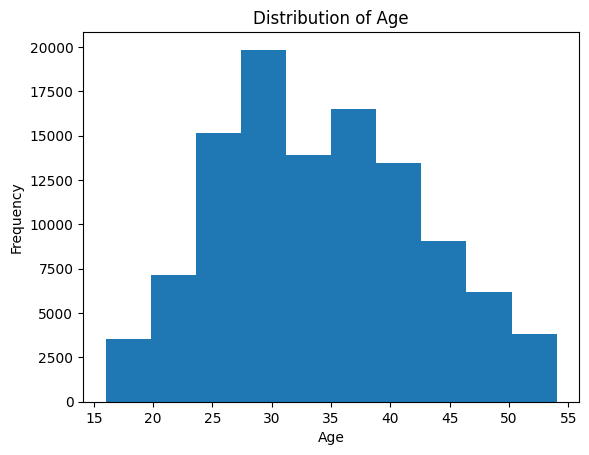

In [78]:
import matplotlib.pyplot as plt

plt.hist(df['age'], bins = 10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

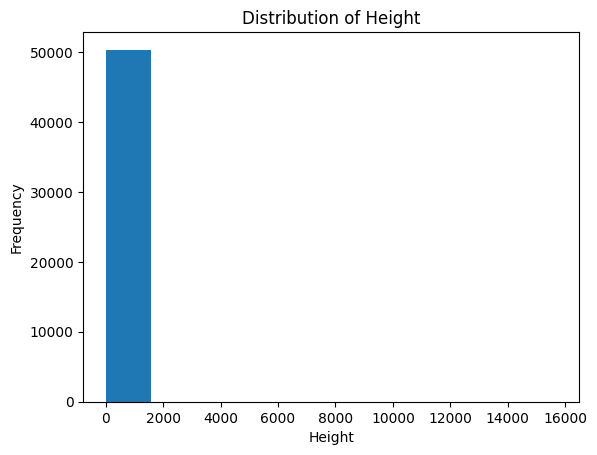

In [79]:
plt.hist(df['height_cm'], bins = 10)
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.title('Distribution of Height')
plt.show()

In [80]:
#Awesome values for height :)
#Let's check it!

#Let 110cm is minimum normal treshold for height and 200cm is maximum
print('< Minimum treshold values:')
low_height_values = df[df['height_cm'] < 110]['height_cm']
print(len(low_height_values))
print(low_height_values)

print('> Maximum treshold values:')
high_height_values = df[df['height_cm'] > 200]['height_cm']
print(len(high_height_values))
print(high_height_values)

#It's looks like high values already was in cm so they don't needed to be multiplied!
df.loc[high_height_values.index, 'height_cm'] = df.loc[high_height_values.index, 'height_cm'].apply(lambda x : np.nan)
df.loc[low_height_values.index, 'height_cm'] = df.loc[low_height_values.index, 'height_cm'].apply(lambda x : np.nan)

< Minimum treshold values:
1372
76         2.0
160       30.0
194        2.0
282       58.0
426       13.0
          ... 
108441    53.0
108478    60.0
108479    54.0
108584    75.0
108589    66.0
Name: height_cm, Length: 1372, dtype: float64
> Maximum treshold values:
361
1051      391.0
1468      419.0
1484      419.0
1544      394.0
1685      404.0
          ...  
106926    404.0
107101    439.0
107726    409.0
107861    437.0
108193    399.0
Name: height_cm, Length: 361, dtype: float64


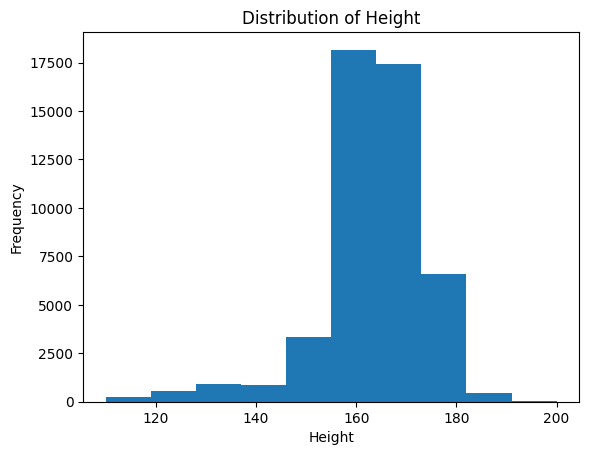

In [81]:
plt.hist(df['height_cm'], bins = 10)
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.title('Distribution of Height')
plt.show()

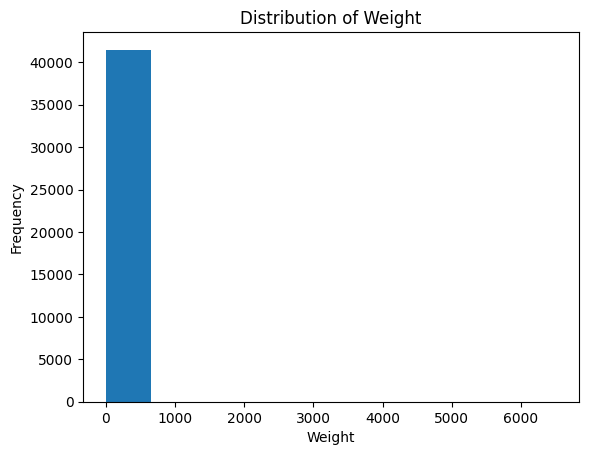

In [82]:
plt.hist(df['weight_kg'], bins = 10)
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Distribution of Weight')
plt.show()

In [83]:
#Awesome values for weight too :)
#Let's check it!

#Let 45kg is minimum normal treshold for weight and 135kg is maximum
print('< Minimum treshold values:')
low_height_values = df[df['weight_kg'] < 45]['weight_kg']
print(len(low_height_values))
print(low_height_values)

print('> Maximum treshold values:')
high_height_values = df[df['weight_kg'] > 135]['weight_kg']
print(len(high_height_values))
print(high_height_values)

#It's looks like high values already was in cm so they don't needed to be multiplied!
df.loc[high_height_values.index, 'weight_kg'] = df.loc[high_height_values.index, 'weight_kg'].apply(lambda x : np.nan)
df.loc[low_height_values.index, 'weight_kg'] = df.loc[low_height_values.index, 'weight_kg'].apply(lambda x : np.nan)

< Minimum treshold values:
382
160        4.0
290       34.0
1484      27.0
2195      26.0
2315      31.0
          ... 
107882    10.0
107970    36.0
108374    28.0
108453    33.0
108547     0.0
Name: weight_kg, Length: 382, dtype: float64
> Maximum treshold values:
29
4430      6515.0
13625      625.0
19349      785.0
20922      164.0
23802      136.0
26045      503.0
39484      137.0
69109      153.0
71104      136.0
80125      145.0
82800      145.0
82934      147.0
83285      162.0
83357      150.0
83383      166.0
85677      150.0
89572      145.0
91494      142.0
92142      152.0
92916      139.0
93039      185.0
93693      142.0
93713      143.0
94179      146.0
94458      166.0
95826      318.0
100603     453.0
102777     172.0
102986     138.0
Name: weight_kg, dtype: float64


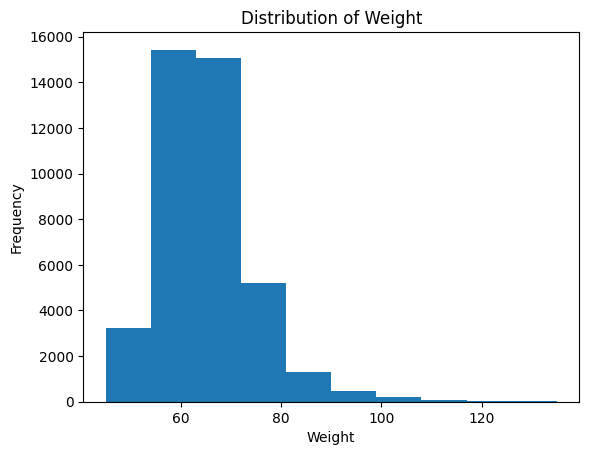

In [84]:
plt.hist(df['weight_kg'], bins = 10)
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Distribution of Weight')
plt.show()